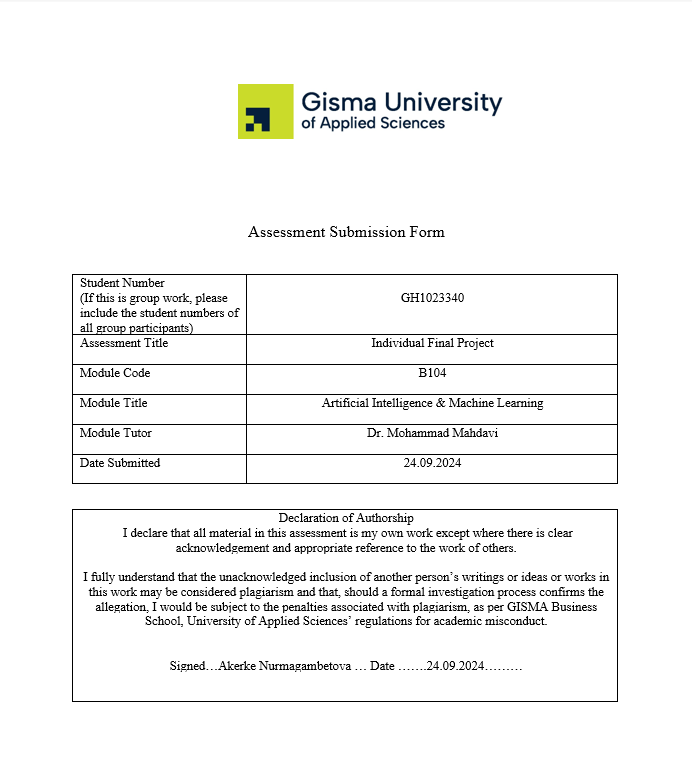

# B104 Artificial Intelligence & Machine Learning #

## The Business Problem ##

Employee Attrition is defined as the employee shortage, due to uncontrollable reasons. It happens in every company, no matter what they do. The main problem is when the attrition rates become high or unpredictable, and it leads to significant threats like increasing recruitment, and training costs. Additionally, it negatively impacts team morale and disrupts business.

The most effective way to solve this problem is to create a predictive machine-learning model, using the HR (Human Resources) data. It is crucial for us to solve this problem since it protects the companies from the shrinkage of the workforce. On a deeper level, it can save the company from destruction and increase the productivity of the company for a smaller price. 

The relevant HR data will be taken from the "IBM HR Analytics Employee Attrition & Performance" dataset, which is in public use in Kaggle. The link to the dataset: "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data". The dataset is specifically designed by IBM data scientists to simulate real-world HR scenarios. The dataset consists of 1470 objects, which is considered small to medium dataset size.

"https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data"

## The Machine Learning Task ##

The task is supervised learning since we have labeled data, where the target variable is Attrition. The model that we need to develop is a binary classification model (binominal) to predict whether an employee will leave the company(1) or stay(0). The target goal is to train the model to classify employees into these two categories based on various features such as: 
* Education
* Job Satisfaction
* Performance Rating
* Work-Life Balance
* Monthly Income 
* Job Role
  
Finally, the most suitable algorithms for this dataset are Logistic Regression and Support Vector Machine (SVM).
The reason the Logistic Regression algorithm was chosen, is that is simple and suitable for binary classification tasks.
On the other hand, SVM is an excellent choice because of its ability to handle non-linear classification problems using the kernel trick. (Andriy Burkov, 2019). After, we will compare the performance of a linear model (Logistic Regression) with a non-linear model (SVM with RBF kernel). 

After training, the models will be evaluated using accuracy to check the performance. Also, we will compare both algorithms' results and choose which is the best algorithm. 

## Import all the crucial libraries and the dataset ##

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


df = pd.read_csv('IBM.csv')

## Data Overview ##

The first thing that needs to be done is to view the statistical details of the dataset such as percentile, mean, std, min, and max. Before we import the necessary libraries for the project and after with the "describe()" function we overview the dataset.  

In [25]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Identify Data Types ##

After, let's identify the data type, that we have. The "info()" function displays the basic information about the dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

After, the categorical variables were separated and printed. 

In [95]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## Data Quality Anomaly Detection ##

### Finding Missing Values/Data Completeness ### 

It is necessary to check if the dataset is incomplete, with the ".isnull()" function we check missing values. 

In [46]:
missing_data = df.isnull().any()
print(missing_data)

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

The dataset is complete since we have False for non-missing values.

### Identify Duplicate Records/Data Uniqueness ###

Additionally, we need to identify the duplicate data with the ".duplicated()" function.  

In [28]:
duplicate = df.duplicated()
print(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool


The result is False, and this means data is unique.

### Number of Labels ### 

The count of distinct labels in a categorical variable named cardinality. This high cardinality (high label level) can create significant challenges in machine learning models. 

In [94]:
for var in categorical: 
    print(var, ' consists of  ', len(df[var].unique()), ' labels')

Attrition  consists of   2  labels
BusinessTravel  consists of   3  labels
Department  consists of   3  labels
EducationField  consists of   6  labels
Gender  consists of   2  labels
JobRole  consists of   9  labels
MaritalStatus  consists of   3  labels
Over18  consists of   1  labels
OverTime  consists of   2  labels


According to the results of the cardinality test, the variables do not have high cardinality, which means they do not need to be preprocessed. 

### Check For Outliers ###

Before deciding which method is the most suitable to detect the outliers (values that are excessively different), we need to check if the data is normally distributed or skewed. The density function or histogram will show the distribution of the variables. "MonthlyIncome", "DistanceFromHome", and "TotalWorkingYears" are selected to check for the outliers, due to their numerical nature and the fact that outliers in these variables can have a significant impact on model performance and interpretation. (GOYAL, 2021)

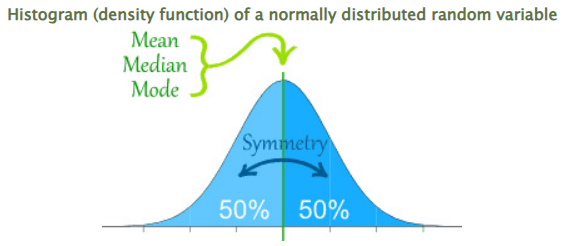

In the picture we can see the histogram of the normally distributed random variable, it is bell-shaped. The mean, mode, and median are equal in a normal distribution. (National Cancer Institute, n.d.)


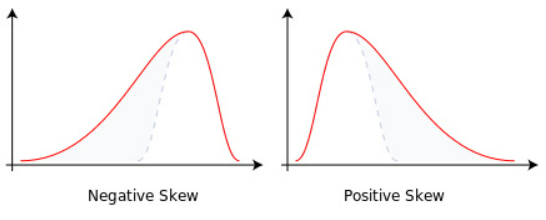

In this picture, we can see the histogram of the non-normal distributions, the right-skewed histograms are positive, and the left-skewed are negative. (National Cancer Institute, n.d.)

For the histogram construction, the matplotlib library was used. The "hist()" function is used to plot the histogram  

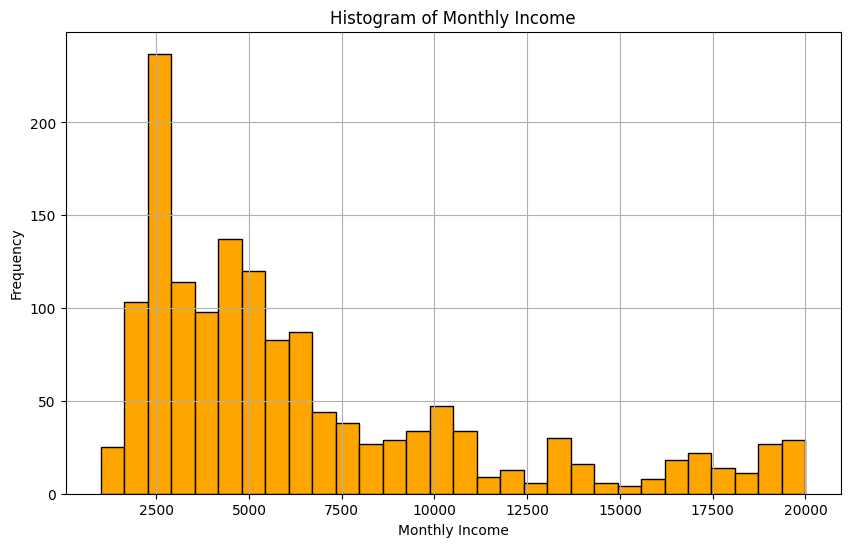

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Income')
plt.grid()
plt.show()

The "MonthlyIncome" variable is not normally distributed, it shows a right skew(positive).

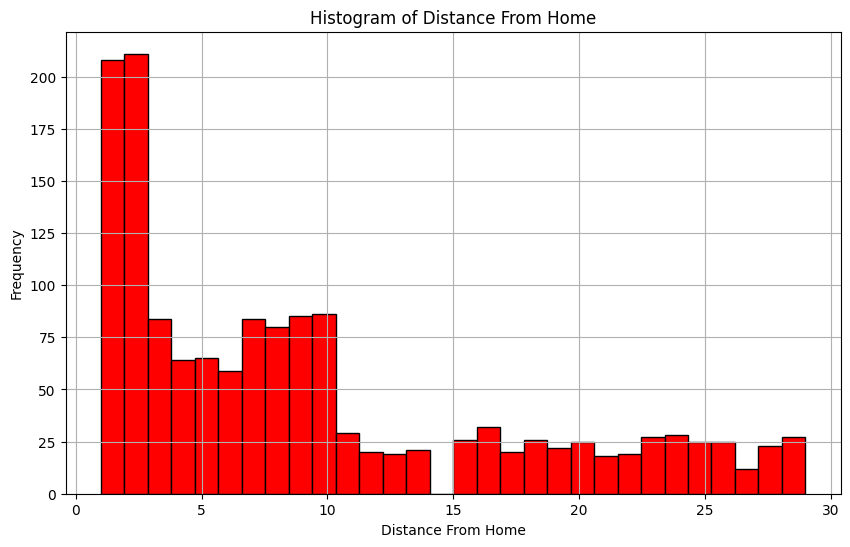

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df['DistanceFromHome'], bins=30, color='red', edgecolor='black')
plt.xlabel('Distance From Home')
plt.ylabel('Frequency')
plt.title('Histogram of Distance From Home')
plt.grid()
plt.show()

The distribution of the "DistanceFromHome" is right-skewed (positive).

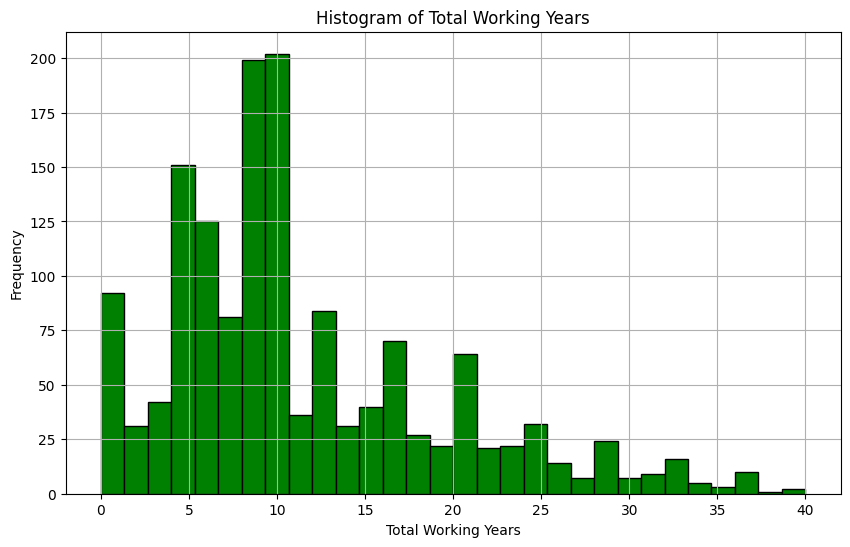

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalWorkingYears'], bins=30, color='green', edgecolor='black')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.title('Histogram of Total Working Years')
plt.grid()
plt.show()

The distribution of the "TotalWorkingYears" is skewed to the right (positive), and it means that the data does not appear to be normally distributed.

All three variables are non-normally distributed, to be exact all of them are positive-skewed. Based on that, the Interquartile Range (IQR) method for outliers will be the best for our task. It does not assume the variable is normally distributed since it is based on the median and percentiles (50% of the middle). Additionally, in the IQR method the mean and standard deviation would not give misleading results. (Hleap, 2024)

The IQR divides the dataset into four equal quartiles to measure the variability. The data is sorted in ascending order and splited into four equal quartiles (Q1, Q2, Q3, and Q4). 
The IQR  is the difference between Q1 and Q3: </br>
_IQR = Q3 – Q1_, where Q1 is the 25th Percentile and Q3 is the 75th Percentile. </br> 
If the data is below Q1 – 1.5 IQR (lower_bound) or above Q3 + 1.5 IQR (upper_bound), it is outlier. (Khan Academy, n.d.)

The function "find_outliers" calculates the IQR, lower_bound and upper_bound. The data points that fall outside these bounds (outliers) are stored in the dictionary (outliers_dict).

In [32]:
columns_check = ['MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears']
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[(data[column]<lower_bound) | (data[column]>upper_bound)]

outliers_dict = {}

for column in columns_check:
    outliers_dict[column] = find_outliers(df, column)

for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print("\n")

Outliers in 'MonthlyIncome':
None


Outliers in 'DistanceFromHome':
None


Outliers in 'TotalWorkingYears':
None




### Conclusion of the Data Anomaly Detection ###

As we can see, there are no outliers in "MonthlyIncome", "DsitanceFromHome", and "TotalWorkingYears". 
Finally, we can conclude that the dataset is complete, unique, and does not have any outliers, so it can be said that the data anomaly was not detected. 

## Distribution of Attrition ##

The next thing, that we did is that we constructed the diagram of the distribution of employee attrition. The " plt.bar" function was used from the matplotlib library, which creates the bar charts of the counts of employee attrition. 

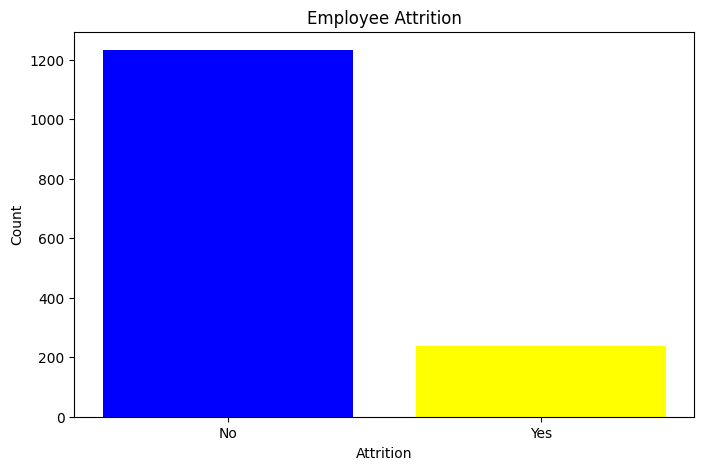

In [33]:
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'yellow'])
plt.title('Employee Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart of the employee attrition shows that the count of employees, who stayed is much higher than who left. The dataset is imbalanced, the "No" class significantly outnumbers the other class. This imbalance can lead to several issues, like poor model performance, biased predictions, and misleading evaluation metrics. Based on that, the dataset require any
sampling or balancing techniques. 

## Imbalance Handling ##

The sampling technique that was chosen is the Synthetic Minority Oversampling Technique (SMOTE). The SMOTE is a statistical technique for imbalanced data, it generates synthetic samples for the minority class ("Yes" class in our case) to balance the class distribution. It takes the samples from the feature spaces, and not just copies the instances from the dataset. (Microsoft, n.d.)

First of all, before applying the SMOTE technique, we need to convert the categorical variables to numerical variables (One-Hot Encoding). The first line of the code below transforms the variables and then the function "pd.get_dummies()" creates a "dummy" variable for each category.

X is defined as the feature vector, and Y is defined as the target variable. The dataset is split into training and testing sets using "train_test_split()" from sklearn.model_selection module. The SMOTE function was created with the imblearn.over_sampling module.  The "fit_resample()" generates synthetic samples for the minority class, resulting in the resampled feature set (X_resampled) and target variable (y_resampled).

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Attrition_Yes', axis=1)  
y = df_encoded['Attrition_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:")
print(df['Attrition'].value_counts())
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Resampled class distribution:
Attrition_Yes
False    978
True     978
Name: count, dtype: int64


We got the resampled class distribution with the same count for both classes, which means the SMOTE oversampling technique worked. To visually picture the resampled employee attrition, we will use the same function, that we used for the bar chart construction. 

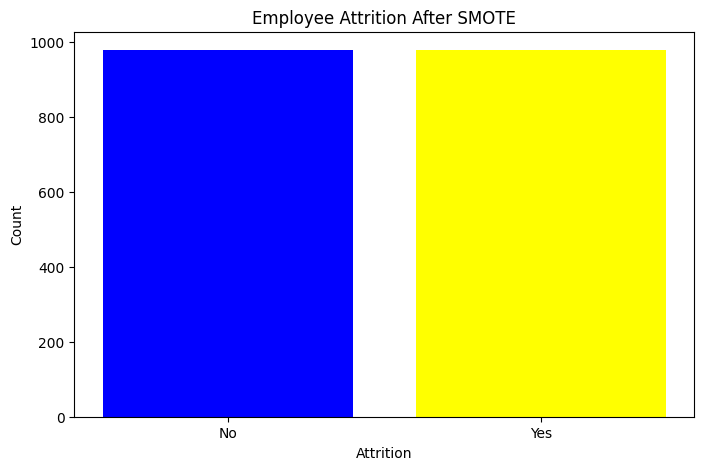

In [26]:
attrition_counts_resampled = y_resampled_series.value_counts()
plt.figure(figsize=(8, 5))
plt.bar(attrition_counts_resampled.index, attrition_counts_resampled.values, color=['blue', 'yellow'])
plt.title('Employee Attrition After SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['No', 'Yes'], rotation=0)  
plt.show()

## Feature Scaling ## 

Feature Scaling is the final step in data preprocessing in Machine Learning, which is used to normalize the independent variables or features. Logistic regression works by estimating the probabilities of classes. The optimization process is less sensitive to the scale of the features compared to distance-based algorithms, so feature scaling will not be implemented for this algorithm. </br>

SVM is sensitive to the scale of input features; without scaling, features with large magnitudes can negatively influence on the decision-making process. According to that, the Standard Scaler is the most suitable method for SVM because it ensures that all features have a mean of 0 and a standard deviation of 1. Additionally, the Standard Scaler promotes equal contribution from all features, which leads to the SVM finding the optimal separating hyperplane more effectively. (Andriy Burkov, 2019)

When the SMOTE method was implemented, the dataset was divided into training and testing sets, so it was unnecessary to do it again. With the scikit-learn library, we created the "StandardScaler" object. The "fit_transform()" function calculated the mean and standard deviation based on the training dataset, and after applied and stored them into the "X_train_scaled". 

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

To check if the feature scaling worked, the histogram was built. 
First, the original data's subplot was created, and after the subplot for the scaled data. In order not to build a histogram for all objects in the dataset, already-known "MonthlyIncome", "DistanceFromHome", "TotalWorkingYears" variables were taken.

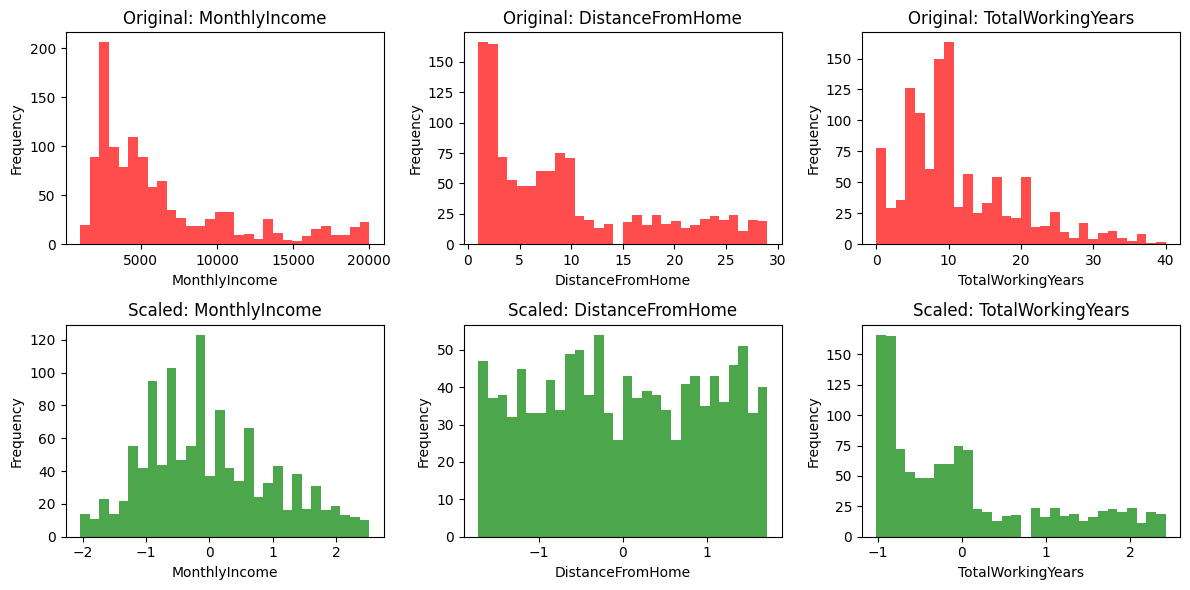

In [69]:
def plot_histograms(X, X_scaled, feature_names):
    plt.figure(figsize=(12, 6))

    for i, feature in enumerate(feature_names):
        plt.subplot(2, len(feature_names), i + 1)
        plt.hist(X[feature], bins=30, alpha=0.7, color = 'red', label='Original')
        plt.title(f'Original: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        #Scaled Data
        plt.subplot(2, len(feature_names), len(feature_names) + i + 1)
        plt.hist(X_scaled[:, i], bins=30, alpha=0.7, color='green', label='Scaled')
        plt.title(f'Scaled: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


feature_names = ['MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears'] 
plot_histograms(X_train[feature_names], X_train_scaled, feature_names)


As can be seen, the Standard Scaling has effectively transformed the original distribution of the variables into the standardized forms. 

## Data preprocessing ## 

Data preprocessing is one of the most important step in Machine Learning Model creation. It is the data mining technique of preparing the raw data and transforming it into a suitable format. 
The crucial steps, that we have done in data preprocessing: 
* Chose the relevant dataset from the big company IBM

* Imported all the essential libraries and the dataset in Jupyter Notebook

* Overviewed our dataset and identified the data types   

* Identified that the dataset does not have any missing values

* Identified that the dataset does not have any duplicate values

* Discovered that the dataset does not have any outliers

* Encoded the categorical data (One-Hot Encoding)

* Splitted the dataset into training set and test set

* Balanced the classes with the SMOTE oversampling technique

* Implemented the Standard Scaler method for the Feature Scaling

## Feature Engineering ##  

Feature Engineering is the essential step of data preprocessing in Machine Learning. It creates new features, that might have more predictive power, from the existing data to help improve model performance. 

### Income growth feature ###

"MonthlyIncome" and "TotalWorkingYears" compute income growth over time: </br>
IncomeGrowth = MonthlyIncome / TotalWorkingYears. </br>
This could indicate whether higher-income employees are less likely to leave.

In [78]:
df_encoded['IncomeGrowth'] = df_encoded['MonthlyIncome'] / df_encoded['TotalWorkingYears']  
print(df_encoded[['IncomeGrowth', 'MonthlyIncome', 'TotalWorkingYears']])

      IncomeGrowth  MonthlyIncome  TotalWorkingYears
0       749.125000           5993                  8
1       513.000000           5130                 10
2       298.571429           2090                  7
3       363.625000           2909                  8
4       578.000000           3468                  6
...            ...            ...                ...
1465    151.235294           2571                 17
1466   1110.111111           9991                  9
1467   1023.666667           6142                  6
1468    317.058824           5390                 17
1469    734.000000           4404                  6

[1470 rows x 3 columns]


### Overall satisfaction feature ###

"RelationshipSatisfaction", "JobSatisfaction", and "EnviromentSatisfaction" create a feature that reflects the overall satisfaction of the employee: </br>
This could indicate if the overall satisfaction level reflects the attrition rate.

In [90]:
df_encoded['OverallSatisfaction'] = (df_encoded['RelationshipSatisfaction'] + df_encoded['JobSatisfaction'] + df_encoded['EnvironmentSatisfaction']) / 3
print(df_encoded[['OverallSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction', 'EnvironmentSatisfaction']])

      OverallSatisfaction  RelationshipSatisfaction  JobSatisfaction  \
0                2.333333                         1                4   
1                3.000000                         4                2   
2                3.000000                         2                3   
3                3.333333                         3                3   
4                2.333333                         4                2   
...                   ...                       ...              ...   
1465             3.333333                         3                4   
1466             2.000000                         1                1   
1467             2.000000                         2                2   
1468             3.333333                         4                2   
1469             2.000000                         1                3   

      EnvironmentSatisfaction  
0                           2  
1                           3  
2                           4  
3      

The Satisfaction levels  are:
1 - 'Low'
2 - 'Medium'
3 - 'High'
4 - 'Very High'

## Logistic Regression ##

Logistic regression is a linear model used for predicting binary outcomes. The response variable in this model is categorical with two possible values, often represented as True/False or 1/0. The probabilities associated with these outcomes are denoted by π for success and 1−π for failure. Consequently, the response variable is described by a binomial distribution, represented as:


y∼B(η,π), where:


η is the binomial denominator, which takes values of either 0 or 1 for a binary outcome

π represents the probability of success. (Fu-berlin.de, 2024)

### The Model Training ###

In the previous sections of this project, the following steps were done:
* Imported Necessary Libraries
* Splitted the Dataset into training and test sets
* X was defined as the feature vector, and Y was defined as the target variable

Based on that, we can start to start to train the model with the Logistic Regression algorithm.

First, we created an instance of the Logistic Regression Model with a maximum of 1000 number of iterations and ran it with the basic hyperparameters. The "fit()" method adjusts the model's parameters to best fit the data.  

In [19]:
logistic_model = LogisticRegression(solver='liblinear', max_iter = 1000)

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#### Hyperparameter Tuning ####

Hyperparameters are parameters whose values are set before the learning process begins. Unlike model parameters like weights in Logistic Regression, hyperparameters control the learning process. Hyperparameters calculate the model parameters.</br>

Hyperparameter tuning is identifying the best set of hyperparameter values for a learning algorithm. The goal is to find a hyperparameter combination that improves the model's performance by reducing a specific loss function. (Amazon Web Services, Inc., n.d.)

Logistic Regression has two main hyperparameters, that can be tuned: solver and c. 
* C: This parameter is the inverse of the regularization strength, it controls the regularization strength.  A smaller value of C indicates stronger regularization, which prevents overfitting. A larger C may lead to overfitting.
* solver: This specifies the algorithm to use for optimization. Examples of the solvers are newton-cg, lbfgs, liblinear, and others. 

For this model, we will use Grid Search with Cross-Validation (GridSearchCV), which is a hyperparameter tuning method. It explores various combinations of parameter settings systematically and is also included in the scikit-learn library. GridSearchCV was selected, since it ensures that the model is tuned effectively across the entire dataset, rather than just a specific portion.

First, the parameter grid was defined, and the hyperparameters(C and solver) were specified in the grid. The regularization parameter for the C hyperparameter ranged from very small (0.01) to large (1000). After, GridSearchCv with arguments was initialized. The "fit()" method performed the cross-validation for each combination of the hyperparameter. After fitting, the grid search object contained the best parameters identified during the search, and then the best logistic model was printed.

In [121]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  
}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

print("Best Parameters: ", best_parameters)
print(best_logistic_model)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:  {'C': 10, 'solver': 'liblinear'}
LogisticRegression(C=10, max_iter=1000, solver='liblinear')


The GridSearchCV is successfully implemented. The model is now set up as Logistic Regression(C=10, max_iter=1000, solver='liblinear'). 

### The Model Assessment ###

The "predict()" method was used to generate the predicted labels, it took the test data as input and returned the predicted values. 

In [124]:
y_pred = best_logistic_model.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

After, we can see the results of the prediction. "True" stands for employee attrition, and "False" stands for the employee stay. 

The "predict_proba()" method counts the probabilities in the array form for the target variable in this case. The "where()" function returns the elements based on the condition (probabilities >= 0.5)

In [20]:
probabilities = logistic_model.predict_proba(X_test)[:, 0]  
rounded_probabilities = np.where(probabilities >= 0.5, 1, 0)
rounded_probabilities

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

0 is for the probability of employee stay and 1 is for the probability of employee attrition. 

The "predict_proba()" counts the probability of getting the output of 1.

In [22]:
pos_probabilities = logistic_model.predict_proba(X_test)[:,1]
rounded_pos_probabilities = np.where(pos_probabilities >= 0.5, 1, 0)
rounded_pos_probabilities

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### The Module Evaluation Metrics ###

#### The Accuracy Score ####

Accuracy is a straightforward and intuitive metric that measures how often the model correctly predicts the classes compared to the total number of predictions. 
The accuracy score is calculated as:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

This function calculates the accuracy of the model's predictions, by comparing the true values (y_test) with the predicted values (y_pred_test). y_test represents the actual class labels, while y_pred_test represents the predicted class labels obtained from the test dataset.

In [140]:
print('The accuracy score of the testing set: {0:0.3f}'.format(accuracy_score(y_test, y_pred_test)))

The accuracy score of the testing set: 0.905


After, we compared the training and testing sets. The trained logistic regression model (logreg) made predictions on the training dataset (X_train), and after the predicted labels were stored in the variable y_pred_train

In [28]:
y_pred_train = logistic_model.predict(X_train)

print('The accuracy score of the trainig set: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train)))

The accuracy score of the trainig set: 0.895


Testing set accuracy is 90.5% and the training set accuracy is 89.5%, so the model showed good generalization capabilities, and the performance is balanced between the training and testing sets. That meant that there was no sign of overfitting or underfitting.

## Search Vector Machine (RBF Kernel) ##

Radial Basis Function kernel (RBF) is the one of most used SVM kernels since it is the most powerful and useful. The RBF kernel functions by transforming the data into a high-dimensional space through the computation of dot products and squares of all the features in the dataset. Following this transformation, classification is carried out based on the fundamental principles of Linear SVM. (PyCodeMates, n.d.)

The Formula of the RBF:

K(x 
i
​
 ,x 
j
​
 )=exp(−γ∥x 
i
​
 −x 
j
​
 ∥ 
2
 )

where: K(x 
i
​
 ,x 
j
​
 ): This represents the RBF kernel function applied to two feature vectors 
𝑥
𝑖
 and 
𝑥
𝑗


γ: A parameter that defines the influence of a single training example. </br>

∥
𝑥
𝑖
−
𝑥
𝑗
∥
2

 : The squared Euclidean distance between the feature vectors 
𝑥
𝑖
and 𝑥𝑗.

### The Model Training ###

In the previous sections of this project, the following steps were done:
* Imported Necessary Libraries
* Splitted the Dataset into training and test sets
* X was defined as the feature vector, and Y was defined as the target variable
* Feature Engineering was done

Based on that, we can start to start to train the model with the SVM algorithm with RBF kernel.

First, we created the SVM with an RBF kernel and enabled probability estimates. After training the SVM model on the scaled training data (X_train) and corresponding target labels (y_train).

In [34]:
svm_rbf = SVC(kernel='rbf', probability=True)  

svm_rbf.fit(X_train, y_train)

SVC(probability=True)

#### Hyperparameter Tuning ####

For the Support Vector Machine (SVM) with an RBF kernel, the most commonly tuned hyperparameters are: </br>
* C (the regularization parameter) 
* gamma (the kernel coefficient)
  (Andriy Burkov, 2019)

First, the parameter grid was specified with the range of values for the hyperparameters to tune. For SVM with RBF kernel, we used C and gamma.

In [1]:
param_grid_svm = {
    'svc__C': [0.1, 1, 10, 100],  
    'svc__gamma': [0.001, 0.01, 0.1, 1]  
}

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC(kernel='rbf', probability=True))  
])

After the GridSeachCv object was created and passed in the SVM model the parameter grid, and any additional parameters like cross-validation folds (cv = 5).

In [6]:
grid_search_svm = GridSearchCV(pipeline, 
                                param_grid_svm, 
                                cv=5,
                                scoring='accuracy' 
                               )

After we fitted the model to the training data and printed the best hyperparameter that was found.

In [10]:
grid_search_svm.fit(X_train, y_train)


print("The Best hyperparameters found: ", grid_search_svm.best_params_)

Best hyperparameters found:  {'svc__C': 10, 'svc__gamma': 0.001}


Then, we made predictions on the test set and got the probabilities for the positive class.

### The Model Assessment ###

In [26]:
y_pred_svm = grid_search_svm.predict(X_test)

print( "The predictions of the unseen data: ", y_pred_svm)

The predictions of the unseen data:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False  True False  True False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False F

In [23]:
svm_prob = grid_search_svm.predict_proba(X_test)[:, 0]

rounded_prob_svm = np.where(probabilities >= 0.5, 1, 0)
rounded_prob_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
pos_svm_prob = grid_search_svm.predict_proba(X_test)[:, 1]

rounded_pos_prob_svm = np.where(probabilities >= 0.5, 1, 0)
rounded_pos_prob_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

### The Module Evaluation Metrics ###

#### The Accuracy Score ####

In [36]:
y_pred_train_svm = svm_rbf.predict(X_train)

print('The accuracy score of the trainig set: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_svm)))

The accuracy score of the trainig set: 0.832


In [27]:
print('The accuracy score of the testing set: {0:0.3f}'.format(accuracy_score(y_test, y_pred_svm)))

The accuracy score of the testing set: 0.888


Testing set accuracy is 88.8% and the training set accuracy is 83.2%, so the model showed good generalization capabilities, and the performance is balanced between the training and testing sets. That meant that there was no sign of overfitting or underfitting.

## The Conclusion ##

When both a linear model (Logistic Regression) and a non-linear model (SVM with RBF kernel) were implemented it was found that Logistic Regression had the best results. This states that throughout the data, there is a straightforward relationship. That makes the relationship easy to use. </br> 

One of the main strengths of using Logistic Regression is its simplicity and ease of interpretation. It clearly shows which features, like job satisfaction or work-life balance, are most important for predicting employee attrition. This makes it easier for the business to understand the results and take action.</br> 

However, a limitation is that Logistic Regression might miss some complex patterns that a non-linear model could capture. There are some drawbacks, such as linearity assumption, and relationships between features and the target variable, which limit the model’s ability to capture more complex patterns than nonlinear models such as SVMs would.</br>

According to the current results, the business is able to achieve better performance by concentrating on enhancing the factors identified by the model, such as employee satisfaction, work environment, etc. For example, job satisfaction is an important criteria, the business could take steps towards improving this area, for instance through management recognition activities or creating career advancement opportunities.

Overall, the data-driven recommendations are clear: focus on the most important features identified by the model to improve employee satisfaction and performance. Logistic Regression is very practical and it creates the information that influences the decision-making for the improvement of certain key factors in the organization.

## References: ##
1. Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov.
2. GOYAL, C. (2021). How to Detect and Remove Outliers | Outlier Detection And Removal. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/.
3. National Cancer Institute (n.d.). Learn More about Normal Distribution. Available at: https://dietassessmentprimer.cancer.gov/learn/distribution.html#:~:text=A%20variable%20that%20is%20normally,to%20describe%20departures%20from%20normality.%5D [Accessed 24 Sep. 2024].
4. National Cancer Institute (n.d.). Learn More about Normal Distribution. Available at: https://dietassessmentprimer.cancer.gov/learn/distribution.html#:~:text=A%20variable%20that%20is%20normally,to%20describe%20departures%20from%20normality.%5D [Accessed 24 Sep. 2024].
5. Hleap, S. (2024). The Interquartile Range Method (IQR) To Unmask Outliers. [online] ProCogia. Available at: https://procogia.com/interquartile-range-method-for-reliable-data-analysis/#:~:text=The%20Interquartile%20Range%20(IQR) [Accessed 24 Sep. 2024].
6. Khan Academy. (n.d.). Identifying outliers with the 1.5xIQR rule (article). [online] Available at: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule#:~:text=A%20commonly%20used%20rule%20says.
7. Microsoft (n.d.). SMOTE - Azure Machine Learning. [online] learn.microsoft.com. Available at: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote?view=azureml-api-2.
8. Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov.
9. Amazon Web Services, Inc. (n.d.). What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained - AWS. [online] Available at: https://aws.amazon.com/what-is/hyperparameter-tuning/#:~:text=Hyperparameter%20tuning%20allows%20data%20scientists.
10. Fu-berlin.de. (2024). Logistic Regression. [online] Available at: https://www.geo.fu-berlin.de/en/v/soga-r/Basics-of-statistics/Logistic-Regression/index.html [Accessed 25 Sep. 2024].
11. PyCodeMates. (n.d.). The RBF kernel in SVM: A Complete Guide. [online] Available at: https://www.pycodemates.com/2022/10/the-rbf-kernel-in-svm-complete-guide.html.
12. Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov

‌

‌

‌


The Link to the GitHub repository of the project: "https://github.com/NURnurNURnurNUR/AI"